In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [6]:
df = pd.read_csv('city_day.csv')

In [7]:
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


In [8]:
# List of column names to drop
columns_to_drop = ['City', 'Date']

# Drop the specified columns
df.drop(columns=columns_to_drop, inplace=True)

In [9]:
df.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   PM2.5       24933 non-null  float64
 1   PM10        18391 non-null  float64
 2   NO          25949 non-null  float64
 3   NO2         25946 non-null  float64
 4   NOx         25346 non-null  float64
 5   NH3         19203 non-null  float64
 6   CO          27472 non-null  float64
 7   SO2         25677 non-null  float64
 8   O3          25509 non-null  float64
 9   Benzene     23908 non-null  float64
 10  Toluene     21490 non-null  float64
 11  Xylene      11422 non-null  float64
 12  AQI         24850 non-null  float64
 13  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(1)
memory usage: 3.2+ MB


In [11]:
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


In [12]:
df.isnull()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,True,True,False,False,False,True,False,False,False,False,False,False,True,True
1,True,True,False,False,False,True,False,False,False,False,False,False,True,True
2,True,True,False,False,False,True,False,False,False,False,False,False,True,True
3,True,True,False,False,False,True,False,False,False,False,False,False,True,True
4,True,True,False,False,False,True,False,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,False,False,False,False,False,False,False,False,False,False,False,False,False,False
29527,False,False,False,False,False,False,False,False,False,False,False,False,False,False
29528,False,False,False,False,False,False,False,False,False,False,False,False,False,False
29529,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [13]:
df.isnull().sum()

PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [14]:
# List of column names to drop
columns_to_drop = ['PM10', 'NH3', 'Xylene', 'Toluene']#contains higest no. of null values

# Drop the specified columns
df.drop(columns=columns_to_drop, inplace=True)

In [15]:
df = df.dropna()

In [16]:
df

,PM2.5,NO,NO2,NOx,CO,SO2,O3,Benzene,AQI,AQI_Bucket
28,83.13,6.93,28.71,33.72,6.93,49.52,59.76,0.02,209.0,Poor
29,79.84,13.85,28.68,41.08,13.85,48.49,97.07,0.04,328.0,Very Poor
30,94.52,24.39,32.66,52.61,24.39,67.39,111.33,0.24,514.0,Severe
31,135.99,43.48,42.08,84.57,43.48,75.23,102.70,0.40,782.0,Severe
32,178.33,54.56,35.31,72.80,54.56,55.04,107.38,0.46,914.0,Severe
...,...,...,...,...,...,...,...,...,...,...
29525,7.63,5.91,23.27,17.19,0.46,6.87,19.90,1.45,47.0,Good
29526,15.02,7.68,25.06,19.54,0.47,8.55,23.30,2.24,41.0,Good
29527,24.38,3.42,26.06,16.53,0.52,12.72,30.14,0.74,70.0,Satisfactory
29528,22.91,3.45,29.53,18.33,0.48,8.42,30.96,0.01,68.0,Satisfactory


array([[<AxesSubplot:title={'center':'PM2.5'}>,
        <AxesSubplot:title={'center':'NO'}>,
        <AxesSubplot:title={'center':'NO2'}>],
       [<AxesSubplot:title={'center':'NOx'}>,
        <AxesSubplot:title={'center':'CO'}>,
        <AxesSubplot:title={'center':'SO2'}>],
       [<AxesSubplot:title={'center':'O3'}>,
        <AxesSubplot:title={'center':'Benzene'}>,
        <AxesSubplot:title={'center':'AQI'}>]], dtype=object)

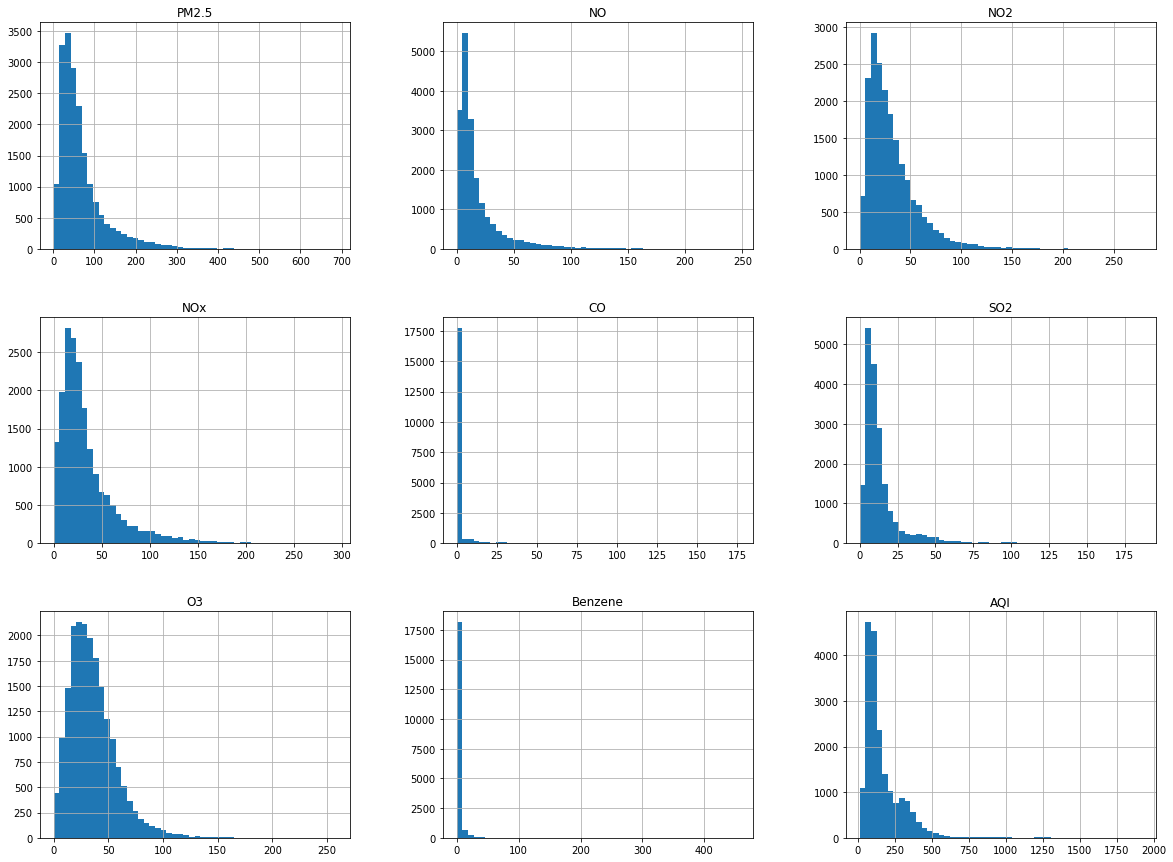

In [17]:
df.hist(bins=50, figsize=(20,15))

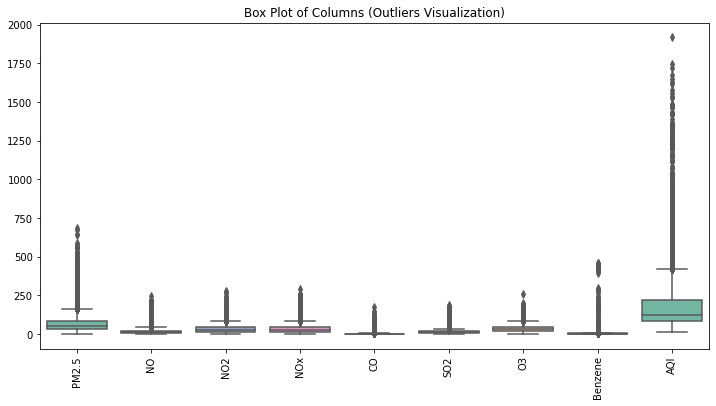

In [18]:
# Create a box plot for each column to visualize outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, orient="v", palette="Set2")
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.title("Box Plot of Columns (Outliers Visualization)")
plt.show()

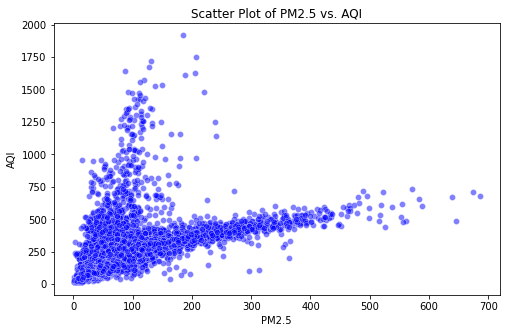

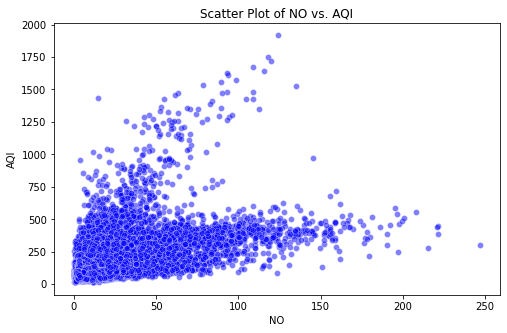

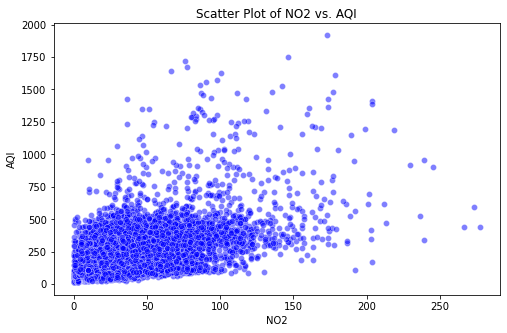

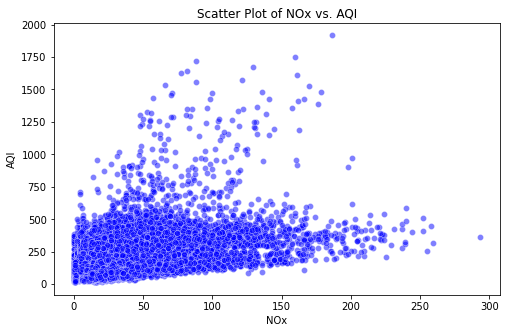

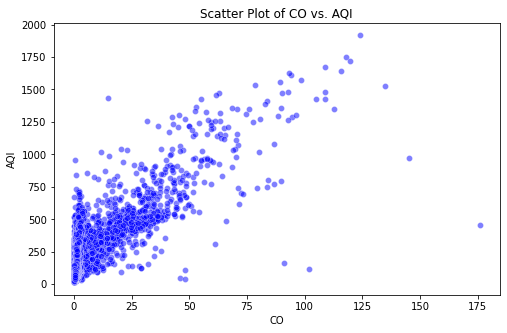

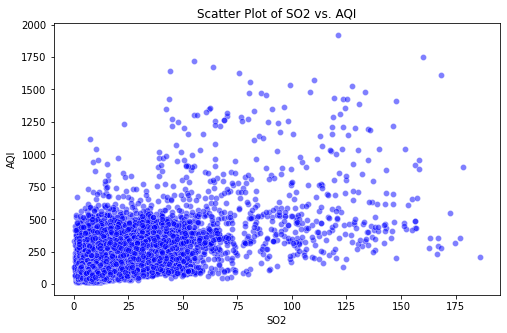

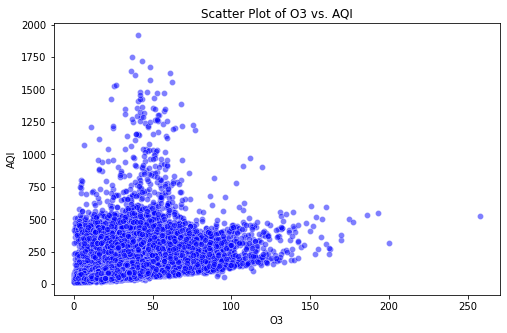

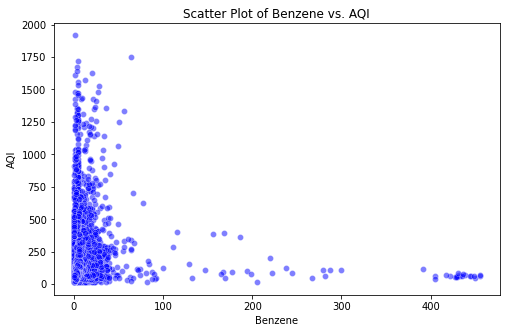

In [19]:
# Create a scatter plot for each column vs. AQI
for column in df.columns:
    if column != 'AQI' and column !='AQI_Bucket':  # Exclude AQI itself
        plt.figure(figsize=(8, 5))
        sns.scatterplot(x=column, y='AQI', data=df, color='blue', alpha=0.5)
        plt.title(f"Scatter Plot of {column} vs. AQI")
        plt.xlabel(column)
        plt.ylabel('AQI')
        plt.show()


In [20]:

# Define a function to remove outliers using the IQR method
def remove_outliers_iqr(data_frame, column_name, iqr_multiplier=1.5):
    Q1 = data_frame[column_name].quantile(0.25)
    Q3 = data_frame[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - iqr_multiplier * IQR
    upper_bound = Q3 + iqr_multiplier * IQR
    return data_frame[(data_frame[column_name] >= lower_bound) & (data_frame[column_name] <= upper_bound)]

# List of columns for which you want to remove outliers
columns_to_remove_outliers = ['PM2.5', 'NO', 'NO2', 'NOx', 'CO', 'SO2', 'O3', 'Benzene','AQI']

# Remove outliers for each specified column
for column in columns_to_remove_outliers:
    df_cleaned = remove_outliers_iqr(df, column)


In [17]:
# # Define a z-score threshold (e.g., 2 or 3, depending on your preference)
# z_score_threshold = 3 # Adjust as needed

# # Calculate the z-scores for each column (excluding non-numeric columns)
# numeric_columns = df.select_dtypes(include=[np.number]).columns
# z_scores = (df[numeric_columns] - df[numeric_columns].mean()) / df[numeric_columns].std()

# # Identify outliers by checking if the absolute z-score is greater than the threshold
# outlier_mask = (np.abs(z_scores) < z_score_threshold).all(axis=1)

# # Filter the DataFrame to keep only the rows without outliers
# df_cleaned = df[outlier_mask]

# # Optionally, you can reset the index of the cleaned DataFrame
# df_cleaned.reset_index(drop=True, inplace=True)

In [21]:
df_cleaned

,PM2.5,NO,NO2,NOx,CO,SO2,O3,Benzene,AQI,AQI_Bucket
28,83.13,6.93,28.71,33.72,6.93,49.52,59.76,0.02,209.0,Poor
29,79.84,13.85,28.68,41.08,13.85,48.49,97.07,0.04,328.0,Very Poor
34,80.65,2.37,22.83,24.00,2.37,25.73,47.30,0.00,294.0,Poor
35,58.36,2.60,21.39,23.31,2.60,32.66,53.54,0.00,149.0,Moderate
36,79.29,1.16,26.94,26.83,1.16,67.41,59.30,0.00,190.0,Moderate
...,...,...,...,...,...,...,...,...,...,...
29525,7.63,5.91,23.27,17.19,0.46,6.87,19.90,1.45,47.0,Good
29526,15.02,7.68,25.06,19.54,0.47,8.55,23.30,2.24,41.0,Good
29527,24.38,3.42,26.06,16.53,0.52,12.72,30.14,0.74,70.0,Satisfactory
29528,22.91,3.45,29.53,18.33,0.48,8.42,30.96,0.01,68.0,Satisfactory


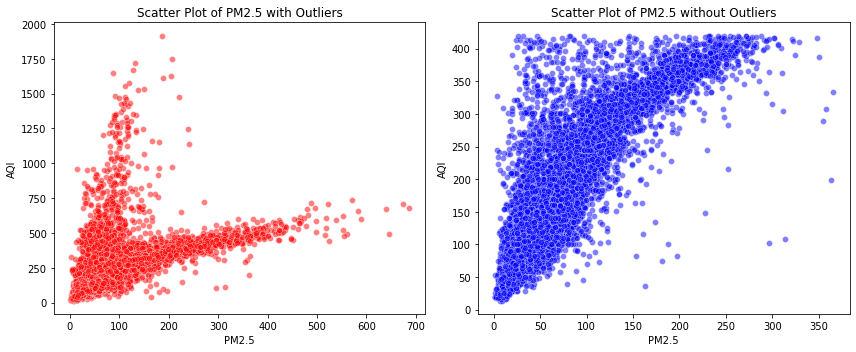

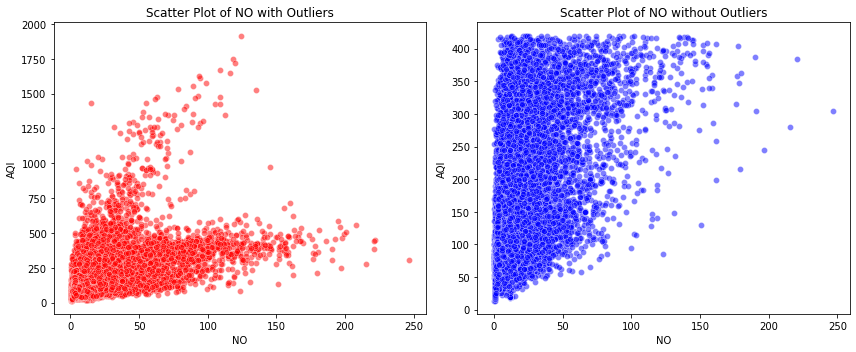

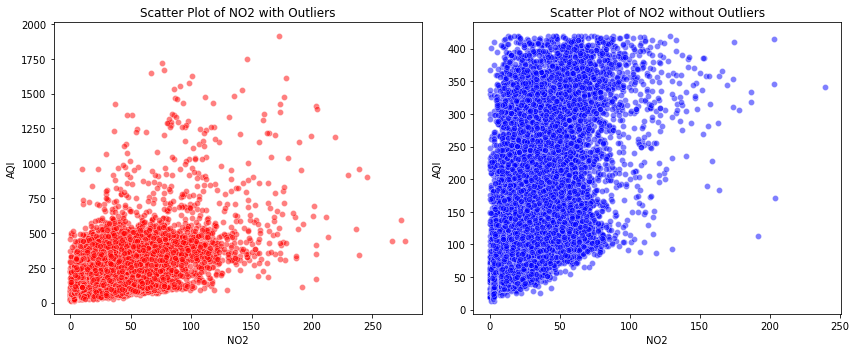

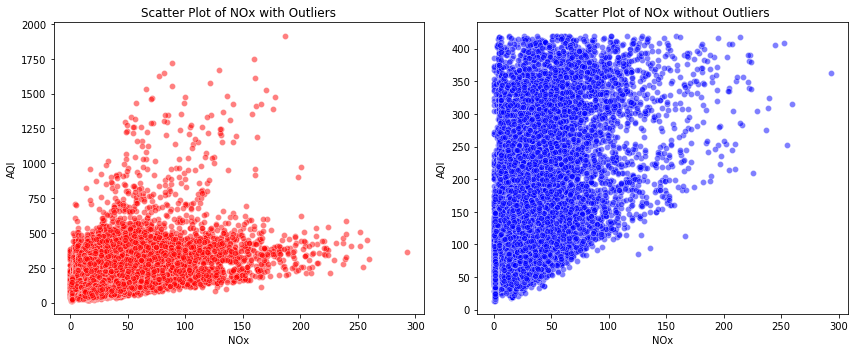

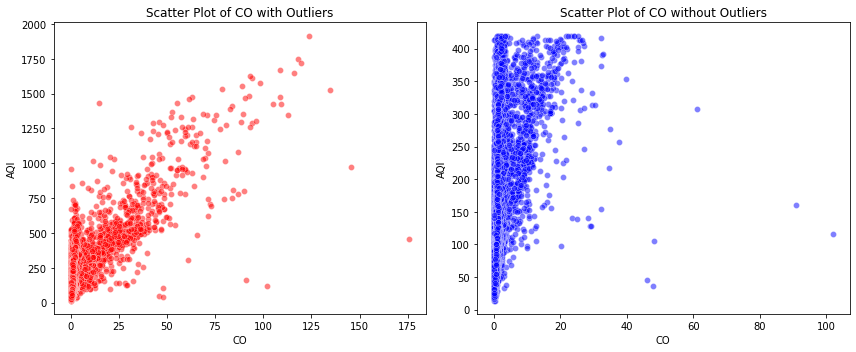

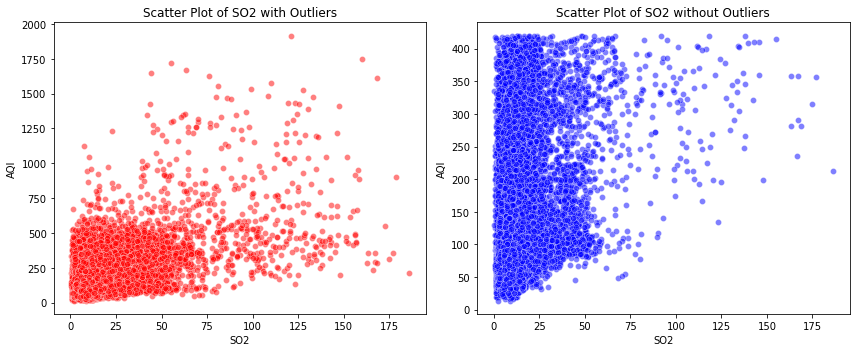

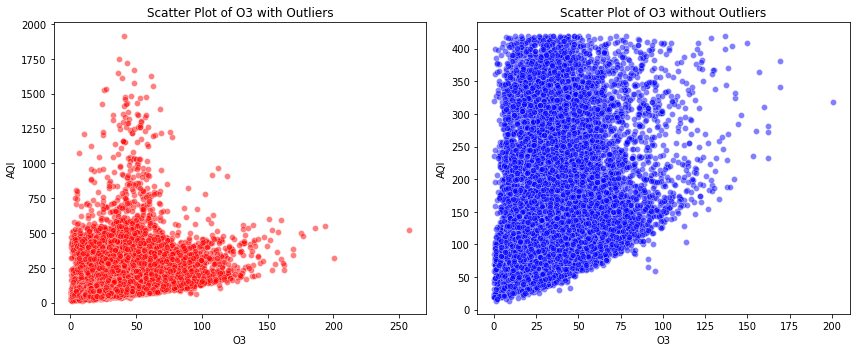

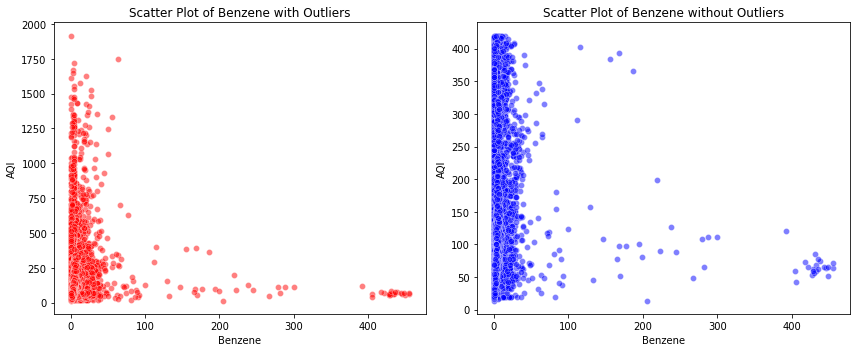

In [22]:
# Iterate through columns
for c in df_cleaned.columns:
    if c != 'AQI' and c != 'AQI_Bucket':
        # Create a figure with two subplots
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))

        # Scatter plot with outliers
        sns.scatterplot(x=c, y='AQI', data=df, color='red', alpha=0.5, ax=axes[0])
        axes[0].set_title(f"Scatter Plot of {c} with Outliers")
        axes[0].set_xlabel(c)
        axes[0].set_ylabel("AQI")


        # Scatter plot without outliers
        sns.scatterplot(x=c, y='AQI', data=df_cleaned, color='blue', alpha=0.5, ax=axes[1])
        axes[1].set_title(f"Scatter Plot of {c} without Outliers")
        axes[1].set_xlabel(c)
        axes[1].set_ylabel("AQI")

        # Adjust the layout for better visualization
        plt.tight_layout()

        # Show the plots
        plt.show()

In [23]:
# Calculate the correlation matrix
correlation_matrix = df_cleaned.corr()

In [24]:
# Customize the output format and print the correlation matrix
print(correlation_matrix.to_string(float_format="%.5f"))


          PM2.5      NO     NO2     NOx      CO     SO2      O3  Benzene     AQI
PM2.5   1.00000 0.51928 0.45205 0.47306 0.11420 0.15613 0.18468  0.01447 0.87053
NO      0.51928 1.00000 0.48954 0.80620 0.08312 0.14651 0.01078  0.02927 0.50400
NO2     0.45205 0.48954 1.00000 0.61745 0.17782 0.33409 0.31789  0.00153 0.49516
NOx     0.47306 0.80620 0.61745 1.00000 0.11444 0.14975 0.09187  0.03001 0.49618
CO      0.11420 0.08312 0.17782 0.11444 1.00000 0.34945 0.02227  0.01255 0.35322
SO2     0.15613 0.14651 0.33409 0.14975 0.34945 1.00000 0.22196  0.00383 0.30543
O3      0.18468 0.01078 0.31789 0.09187 0.02227 0.22196 1.00000  0.01279 0.24257
Benzene 0.01447 0.02927 0.00153 0.03001 0.01255 0.00383 0.01279  1.00000 0.00915
AQI     0.87053 0.50400 0.49516 0.49618 0.35322 0.30543 0.24257  0.00915 1.00000


In [25]:
correlation_matrix['AQI'].sort_values(ascending=False)

AQI        1.000000
PM2.5      0.870530
NO         0.504002
NOx        0.496184
NO2        0.495157
CO         0.353223
SO2        0.305427
O3         0.242567
Benzene    0.009147
Name: AQI, dtype: float64

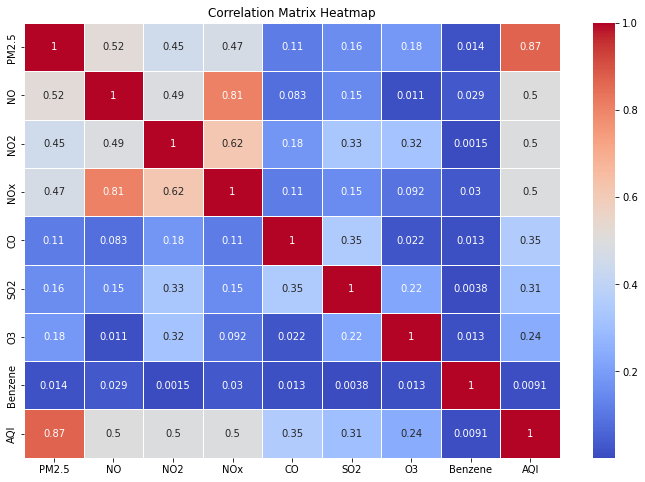

In [26]:
# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()


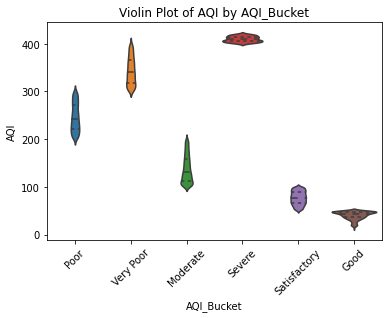

In [27]:
# visualize the distribution of 'AQI' within each 'AQI_Bucket' category
sns.violinplot(x='AQI_Bucket', y='AQI', data=df_cleaned, inner='quartile')
plt.title('Violin Plot of AQI by AQI_Bucket')
plt.xticks(rotation=45)
plt.show()

In [33]:
# Replacing the ordinal values
df_cleaned['AQI_Bucket'].replace({'Good':1, 'Satisfactory':2,'Moderate':3,'Poor':4,'Very Poor':5,'Severe':6}, inplace=True)

C:\Users\kishan\AppData\Local\Temp\ipykernel_29428\2269972763.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['AQI_Bucket'].replace({'Good':1, 'Satisfactory':2,'Moderate':3,'Poor':4,'Very Poor':5,'Severe':6}, inplace=True)


In [32]:
# Create ratio features
df_cleaned['NO_NO2_Ratio'] = df_cleaned['NO'] / df_cleaned['NO2']
df_cleaned['NO2_NOx_Ratio'] = df_cleaned['NO2'] / df_cleaned['NOx']
df_cleaned['CO_SO2_Ratio'] = df_cleaned['CO'] / df_cleaned['SO2']

C:\Users\kishan\AppData\Local\Temp\ipykernel_29428\922201110.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['NO_NO2_Ratio'] = df_cleaned['NO'] / df_cleaned['NO2']
C:\Users\kishan\AppData\Local\Temp\ipykernel_29428\922201110.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['NO2_NOx_Ratio'] = df_cleaned['NO2'] / df_cleaned['NOx']
C:\Users\kishan\AppData\Local\Temp\ipykernel_29428\922201110.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

In [34]:
df_cleaned

,PM2.5,NO,NO2,NOx,CO,SO2,O3,Benzene,AQI,AQI_Bucket,NO_NO2_Ratio,NO2_NOx_Ratio,CO_SO2_Ratio
28,83.13,6.93,28.71,33.72,6.93,49.52,59.76,0.02,209.0,4,0.241379,0.851423,0.139943
29,79.84,13.85,28.68,41.08,13.85,48.49,97.07,0.04,328.0,5,0.482915,0.698150,0.285626
34,80.65,2.37,22.83,24.00,2.37,25.73,47.30,0.00,294.0,4,0.103811,0.951250,0.092110
35,58.36,2.60,21.39,23.31,2.60,32.66,53.54,0.00,149.0,3,0.121552,0.917632,0.079608
36,79.29,1.16,26.94,26.83,1.16,67.41,59.30,0.00,190.0,3,0.043059,1.004100,0.017208
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29525,7.63,5.91,23.27,17.19,0.46,6.87,19.90,1.45,47.0,1,0.253975,1.353694,0.066958
29526,15.02,7.68,25.06,19.54,0.47,8.55,23.30,2.24,41.0,1,0.306464,1.282497,0.054971
29527,24.38,3.42,26.06,16.53,0.52,12.72,30.14,0.74,70.0,2,0.131236,1.576528,0.040881
29528,22.91,3.45,29.53,18.33,0.48,8.42,30.96,0.01,68.0,2,0.116830,1.611020,0.057007


In [35]:
# Calculate the correlation matrix
correlation_matrix = df_cleaned.corr()
correlation_matrix['AQI'].sort_values(ascending=False)

AQI              1.000000
AQI_Bucket       0.949361
PM2.5            0.870530
NO               0.504002
NOx              0.496184
NO2              0.495157
CO               0.353223
SO2              0.305427
O3               0.242567
NO2_NOx_Ratio    0.028402
CO_SO2_Ratio     0.027497
Benzene          0.009147
NO_NO2_Ratio    -0.011345
Name: AQI, dtype: float64

In [36]:
# Create interaction terms
df_cleaned['NO_NO2_Interaction'] = df_cleaned['NO'] * df_cleaned['NO2']
df_cleaned['NO2_NOx_Interaction'] = df_cleaned['NO2'] * df_cleaned['NOx']
df_cleaned['CO_SO2_Interaction'] = df_cleaned['CO'] * df_cleaned['SO2']


C:\Users\kishan\AppData\Local\Temp\ipykernel_29428\2967259667.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['NO_NO2_Interaction'] = df_cleaned['NO'] * df_cleaned['NO2']
C:\Users\kishan\AppData\Local\Temp\ipykernel_29428\2967259667.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['NO2_NOx_Interaction'] = df_cleaned['NO2'] * df_cleaned['NOx']
C:\Users\kishan\AppData\Local\Temp\ipykernel_29428\2967259667.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

In [37]:
df_cleaned

,PM2.5,NO,NO2,NOx,CO,SO2,O3,Benzene,AQI,AQI_Bucket,NO_NO2_Ratio,NO2_NOx_Ratio,CO_SO2_Ratio,NO_NO2_Interaction,NO2_NOx_Interaction,CO_SO2_Interaction
28,83.13,6.93,28.71,33.72,6.93,49.52,59.76,0.02,209.0,4,0.241379,0.851423,0.139943,198.9603,968.1012,343.1736
29,79.84,13.85,28.68,41.08,13.85,48.49,97.07,0.04,328.0,5,0.482915,0.698150,0.285626,397.2180,1178.1744,671.5865
34,80.65,2.37,22.83,24.00,2.37,25.73,47.30,0.00,294.0,4,0.103811,0.951250,0.092110,54.1071,547.9200,60.9801
35,58.36,2.60,21.39,23.31,2.60,32.66,53.54,0.00,149.0,3,0.121552,0.917632,0.079608,55.6140,498.6009,84.9160
36,79.29,1.16,26.94,26.83,1.16,67.41,59.30,0.00,190.0,3,0.043059,1.004100,0.017208,31.2504,722.8002,78.1956
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29525,7.63,5.91,23.27,17.19,0.46,6.87,19.90,1.45,47.0,1,0.253975,1.353694,0.066958,137.5257,400.0113,3.1602
29526,15.02,7.68,25.06,19.54,0.47,8.55,23.30,2.24,41.0,1,0.306464,1.282497,0.054971,192.4608,489.6724,4.0185
29527,24.38,3.42,26.06,16.53,0.52,12.72,30.14,0.74,70.0,2,0.131236,1.576528,0.040881,89.1252,430.7718,6.6144
29528,22.91,3.45,29.53,18.33,0.48,8.42,30.96,0.01,68.0,2,0.116830,1.611020,0.057007,101.8785,541.2849,4.0416


In [38]:
# Calculate the correlation matrix
correlation_matrix = df_cleaned.corr()
correlation_matrix['AQI'].sort_values(ascending=False)

AQI                    1.000000
AQI_Bucket             0.949361
PM2.5                  0.870530
NO                     0.504002
NOx                    0.496184
NO2                    0.495157
NO_NO2_Interaction     0.480545
NO2_NOx_Interaction    0.474173
CO                     0.353223
SO2                    0.305427
CO_SO2_Interaction     0.247369
O3                     0.242567
NO2_NOx_Ratio          0.028402
CO_SO2_Ratio           0.027497
Benzene                0.009147
NO_NO2_Ratio          -0.011345
Name: AQI, dtype: float64

In [39]:
# Define the pollutants to include in the Composite Pollution Index
pollutants = ['PM2.5', 'NO', 'NO2', 'NOx', 'CO']

# Create the Composite Pollution Index as the sum of selected pollutant values
df_cleaned['Composite_Pollution_Index'] = df_cleaned[pollutants].sum(axis=1)


C:\Users\kishan\AppData\Local\Temp\ipykernel_29428\2982572826.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Composite_Pollution_Index'] = df_cleaned[pollutants].sum(axis=1)


In [40]:
# Calculate the correlation matrix
correlation_matrix = df_cleaned.corr()
correlation_matrix['AQI'].sort_values(ascending=False)

AQI                          1.000000
AQI_Bucket                   0.949361
PM2.5                        0.870530
Composite_Pollution_Index    0.803540
NO                           0.504002
NOx                          0.496184
NO2                          0.495157
NO_NO2_Interaction           0.480545
NO2_NOx_Interaction          0.474173
CO                           0.353223
SO2                          0.305427
CO_SO2_Interaction           0.247369
O3                           0.242567
NO2_NOx_Ratio                0.028402
CO_SO2_Ratio                 0.027497
Benzene                      0.009147
NO_NO2_Ratio                -0.011345
Name: AQI, dtype: float64

In [41]:
selected_features = [
    'PM2.5',
    'Composite_Pollution_Index',
    'NO_NO2_Interaction',
    'NO2_NOx_Interaction',
    'NO',
    'NOx',
    'CO',
    'NO2',
    'CO_SO2_Interaction',
    'SO2',
    'O3'
]

X = df_cleaned[selected_features]
y = df_cleaned['AQI']

In [42]:
from sklearn.model_selection import train_test_split

# Split the data into a training set (70%), validation set (15%), and test set (15%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

Multiple linear Regression

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create a Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)


# Validate the model on the validation data
y_val_pred = model.predict(X_val)

# Evaluate the model's performance on the validation data
val_mse = mean_squared_error(y_val, y_val_pred)
val_r2 = r2_score(y_val, y_val_pred)

print("Validation Mean Squared Error:", val_mse)
print("Validation R-squared (R2) Score:", val_r2)

Validation Mean Squared Error: 1279.6394376950218
Validation R-squared (R2) Score: 0.85512028763232


Decision Tree

In [44]:
from sklearn.tree import DecisionTreeRegressor

# Create a Decision Tree Regressor model
tree_model = DecisionTreeRegressor(random_state=42)

# Train the model on the training data
tree_model.fit(X_train, y_train)

# Validate the model on the validation data
y_tree_val_pred = tree_model.predict(X_val)

# Evaluate the model's performance on the validation data
val_mse_tree = mean_squared_error(y_val, y_tree_val_pred)
val_r2_tree = r2_score(y_val, y_tree_val_pred)

print("Decision Tree Validation Mean Squared Error:", val_mse_tree)
print("Decision Tree Validation R-squared (R2) Score:", val_r2_tree)

Decision Tree Validation Mean Squared Error: 1582.7721014492754
Decision Tree Validation R-squared (R2) Score: 0.8207998596740563


Random Forest

In [45]:
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor model
rf_model = RandomForestRegressor(random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Validate the model on the validation data
y_rf_val_pred = rf_model.predict(X_val)

# Evaluate the model's performance on the validation data
val_mse_rf = mean_squared_error(y_val, y_rf_val_pred)
val_r2_rf = r2_score(y_val, y_rf_val_pred)

print("Random Forest Validation Mean Squared Error:", val_mse_rf)
print("Random Forest Validation R-squared (R2) Score:", val_r2_rf)

Random Forest Validation Mean Squared Error: 791.4468285869564
Random Forest Validation R-squared (R2) Score: 0.9103930486180287


KNN

In [46]:
from sklearn.neighbors import KNeighborsRegressor

# Create a KNN Regressor model (specify the number of neighbors, e.g., n_neighbors=5)
knn_model = KNeighborsRegressor(n_neighbors=4)

# Train the model on the training data
knn_model.fit(X_train, y_train)

# Validate the model on the validation data
y_knn_val_pred = knn_model.predict(X_val)

# Evaluate the model's performance on the validation data
val_mse_knn = mean_squared_error(y_val, y_knn_val_pred)
val_r2_knn = r2_score(y_val, y_knn_val_pred)

print("KNN Validation Mean Squared Error:", val_mse_knn)
print("KNN Validation R-squared (R2) Score:", val_r2_knn)


KNN Validation Mean Squared Error: 1656.2922101449276
KNN Validation R-squared (R2) Score: 0.812475974142478


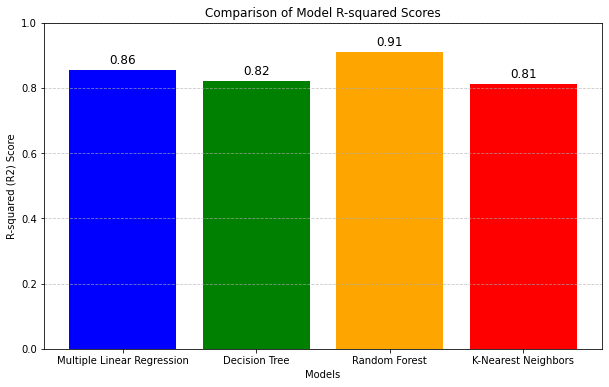

In [47]:
# List of model names
model_names = ['Multiple Linear Regression', 'Decision Tree', 'Random Forest', 'K-Nearest Neighbors']

# List of corresponding R-squared scores
r2_scores = [val_r2, val_r2_tree, val_r2_rf, val_r2_knn]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(model_names, r2_scores, color=['blue', 'green', 'orange', 'red'])
plt.xlabel('Models')
plt.ylabel('R-squared (R2) Score')
plt.title('Comparison of Model R-squared Scores')
plt.ylim(0, 1)  # Set the y-axis limit for R2 scores (0 to 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the scores above the bars
for i, score in enumerate(r2_scores):
    plt.text(i, score + 0.02, f'{score:.2f}', ha='center', fontsize=12)

plt.show()


In [48]:
import joblib

joblib.dump(rf_model, 'Air_Quality_Prediction.pkl')

['Air_Quality_Prediction.pkl']

In [49]:
# Load the trained Random Forest model
loaded_model = joblib.load('Air_Quality_Prediction.pkl')

y_test_pred = loaded_model.predict(X_test)

mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)

print("Random Forest Test Mean Squared Error (MSE):", mse_test)
print("Random Forest Test Root Mean Squared Error (RMSE):", rmse_test)
print("Random Forest Test R-squared (R2) Score:", r2_test)


Random Forest Test Mean Squared Error (MSE): 918.9378696266763
Random Forest Test Root Mean Squared Error (RMSE): 30.31398801917485
Random Forest Test R-squared (R2) Score: 0.8933812990179981
